# Tarea 14

__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema \begin{align} \dot x &= y-y^3\ \dot y &= -x -y^2 \end{align}
Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [1]:
#usando la paqueteria para graficar
using PyPlot

In [9]:
#como lo hicimos en la tarea 13, definiendo el metodo RK4
function rk4(f,list,x0) 
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t+(h/2))
        k3 = f(x+(h/2)*k2, t+(h/2))
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,x) 
     end
     return listx
end

rk4 (generic function with 1 method)

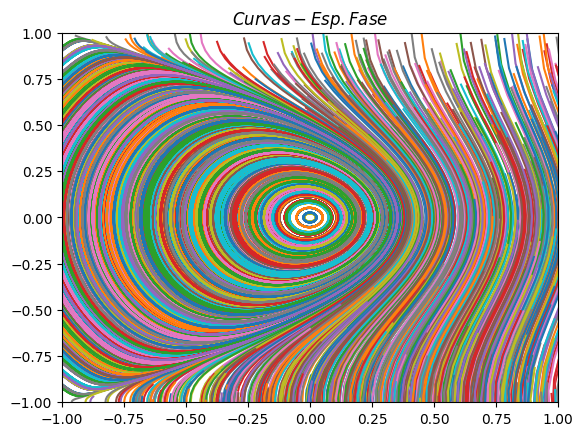

(-1,1)

In [7]:
#Y definamos una matriz de 2x2 para calcular su jacobiano, delta y tao , asi como las respectivas curvas en el espacio fase
A(x,t)=[1*x[2]-1*(x[2])^3,-1*x[1]-1*(x[2])^2] #Definimos nuestra matriz.
listt=0:0.1:30 #Damos un intervalo de tiempo.

for i in 1:1500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(A,listt,[x0,y0]))
    listy=map(x->x[2],rk4(A,listt,[x0,y0]))
    
    plot(listx,listy)
    title(L"Curvas-Esp.Fase")
    legend()
    show;
    
end
xlim(-1,1)
ylim(-1,1)

Ahora si queremos calcular el jacobiano de $\vec F=\left(\begin{array}{cc} y - y^3 \\-x-y^2 \end{array} \right)$ sacamos la derivadas parciales.
$J\vec F=\left(\begin{array}{cc} \frac{\partial }{\partial x}(y - y^3) & \frac{\partial}{\partial y}(y - y^3)  \\ \frac{\partial}{\partial x}(-x-y^2) & \frac{\partial}{\partial y}(-x-y^2)  \end{array} \right)$ $=$ $\left(\begin{array}{cc} 0 & 1-3y^2  \\ -1 &-2y  \end{array} \right) $ Ahora si lo evaluamos en $\vec 0$
$$J\vec F (\vec 0) = \left(\begin{array}{cc} 0 & 1  \\ -1 & 0  \end{array} \right) $$
Podemos notar que $\Delta= \det J\vec F (\vec 0) = 1$, y que $\tau=\text{tr} J\vec F (\vec 0)= 0$. Por lo que el punto $\vec 0$ es un punto centro

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol: $${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?

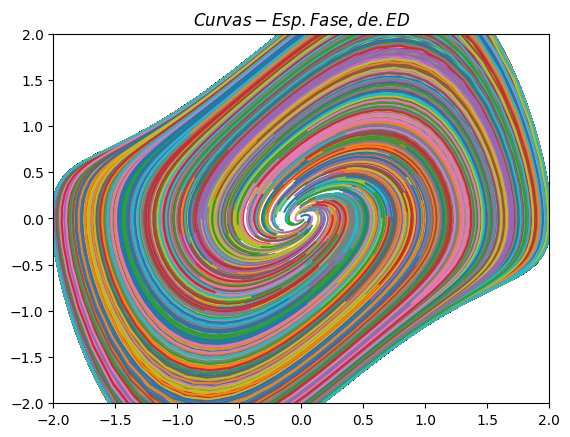

(-2,2)

In [12]:
#Definamos la funcion en la cual la ecuacion diferencial traza las curvas en el espacio fase
f(x,t)=[x[2],-x[1]+x[2]*(1-x[1]^2)] 
listt2=0:0.1:20 

for i in 1:1500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(f,listt2,[x0,y0]))
    listy=map(x->x[2],rk4(f,listt2,[x0,y0]))
    
    plot(listx,listy)
    title(L"Curvas-Esp.Fase, de. ED")
    legend()
    show;
    
end
xlim(-2,2)
ylim(-2,2)

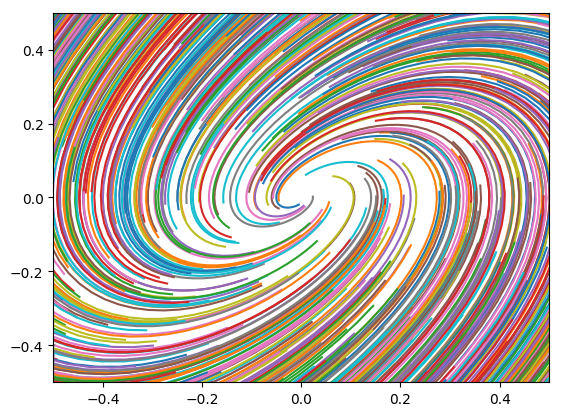

(-0.5,0.5)

In [13]:
#Acercando mas la convergencia de las curvas, cambiando los limites dentro de la grafica 
for i in 1:2000
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(f,listt2,[x0,y0]))
    listy=map(x->x[2],rk4(f,listt2,[x0,y0]))
    
    plot(listx,listy)
end

xlim(-0.5,0.5)
ylim(-0.5,0.5)

Podemos ver que hay una convergencia en el (0,0), se asemeja a los campos vectoriales con rotacional en el origen.


__Usen $\mu=0.5$.
Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.__

In [10]:
using PyPlot 

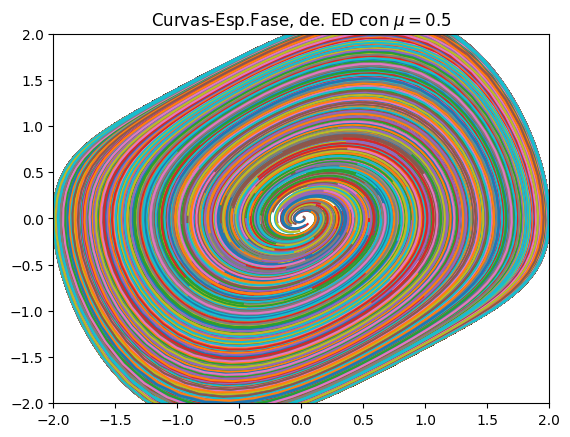

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


(-2,2)

In [5]:
f2(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] #cambiando la funcion f con una función de mu=0.5.
listt3=0:0.1:20
for i in 1:1500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(f2,listt3,[x0,y0]))
    listy=map(x->x[2],rk4(f2,listt3,[x0,y0]))
    
    plot(listx,listy)
    title(L"Curvas-Esp.Fase, de. ED con $\mu=0.5$")
    legend()
    show;
end
xlim(-2,2)
ylim(-2,2)

Podemos observar que a comparación con las curvas de fase en el anterior las curvas se cierran en forma de elipses sin fructuaciones .  

Veamos como  se ven las trayectorias del espacio  $x$, $\dot x(t)$ contra t

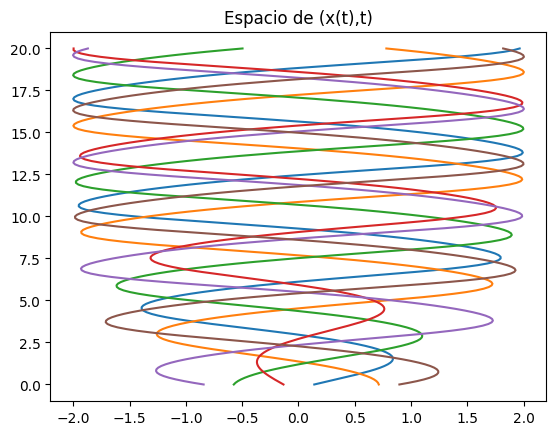

In [8]:
f2(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] # x(t) contra t.
listt3=0:0.1:20
for i in 1:6 #para el numero de iteraciones pequeñas 
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(f2,listt3,[x0,y0]))
    listy=map(x->x[2],rk4(f2,listt3,[x0,y0]))
    
    plot(listx,listt3) #Graficamos (x(t),t).
end
title("Espacio de (x(t),t)")
legend()
show;

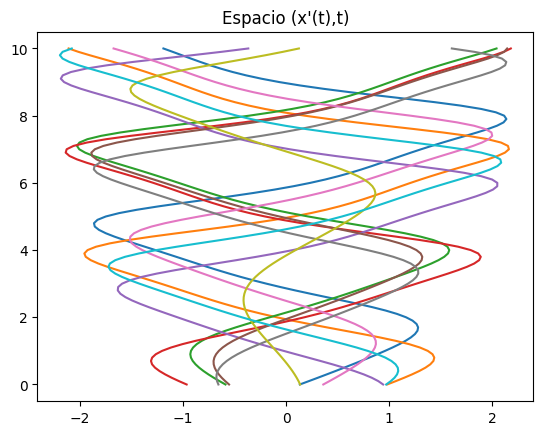

In [8]:
f2(x,t)=[x[2],-x[1]+x[2]*0.5*(1-x[1]^2)] #x'(t) contra t.
listt3=0:0.1:10
for i in 1:10 #menor numero de iteraciones para ver las curvas 
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(f2,listt3,[x0,y0]))
    listy=map(x->x[2],rk4(f2,listt3,[x0,y0]))
    
    plot(listy,listt3) #Graficamos (x'(t),t).
end
title("Espacio (x'(t),t)")
legend()
show;

__Ejercicio 3:__ Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.

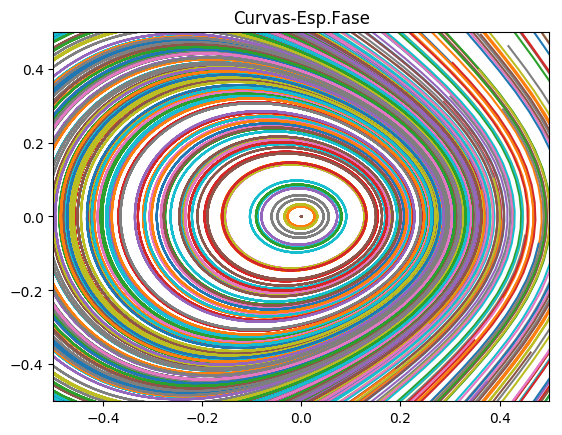

(-0.5,0.5)

In [7]:
#Y definamos una matriz de 2x2 para calcular su jacobiano, delta y tao , asi como las respectivas curvas en el espacio fase
A(x,t)=[1*x[2]-1*(x[2])^3,-1*x[1]-1*(x[2])^2] #Definimos nuestra matriz.
listt=0:0.1:30 #Damos un intervalo de tiempo.

for i in 1:500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(A,listt,[x0,y0]))
    listy=map(x->x[2],rk4(A,listt,[x0,y0]))
    
    plot(listx,listy)
    title("Curvas-Esp.Fase")
    legend()
    show;
    
end
xlim(-0.5,0.5)
ylim(-0.5,0.5)

__Ejercicio 4:__ Hacer lo mismo para el sistema:  
$$ \dot x= x+y-x (x^2+y^2)$$ $$\dot y = y-x-y(x^2+y^2)$$ Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.

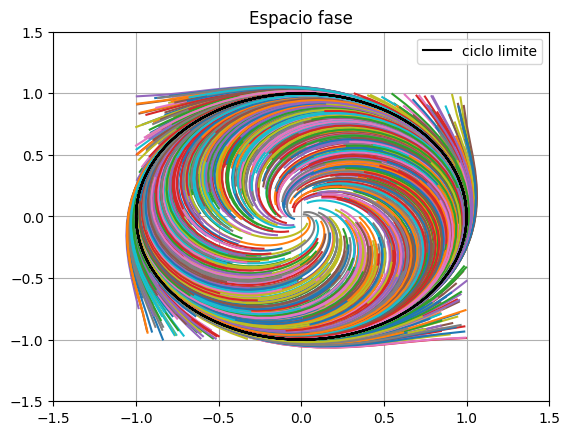

(-1.5,1.5)

In [16]:
A2(x,t)=[x[1]+x[2]-x[1]*((x[1])^2+(x[2])^2),x[2]-x[1]-x[2]*((x[1])^2+(x[2])^2)] #Definimos nuestra matriz.
listt=0:0.1:30 #Damos un intervalo de tiempo.

for i in 1:1500
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx2=map(x->x[1],rk4(A2,listt,[x0,y0]))
    listy2=map(x->x[2],rk4(A2,listt,[x0,y0]))
    
    plot(listx2,listy2)
end
plot(cos.(listt),sin.(listt),color="black",label="ciclo limite") #Graficamos el ciclo límite. $x2+y2=1$
title("Espacio fase")
legend()
grid("on")
show;
xlim(-1.5,1.5)
ylim(-1.5,1.5)

Grafiquemos el Espacio x(t) vs t para ver que el origen (0,0) es un punto repulsor

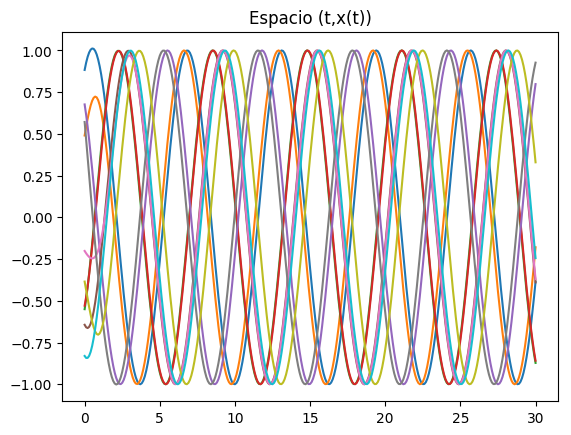

PyObject <matplotlib.text.Text object at 0x7fe89445e090>

In [17]:
for i in 1:10
    x0=1*(2*rand()-1)
    y0=1*(2*rand()-1)
    listx=map(x->x[1],rk4(A2,listt,[x0,y0]))
    listy=map(x->x[2],rk4(A2,listt,[x0,y0]))
    
    plot(listt,listy)
end
title("Espacio (t,x(t))")